<a href="https://colab.research.google.com/github/sahilmerai/ml_basic/blob/master/heart_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
# heart = pd.read_csv("heart.csv")
df = pd.read_csv("heart.csv")


### EDA

In [2]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


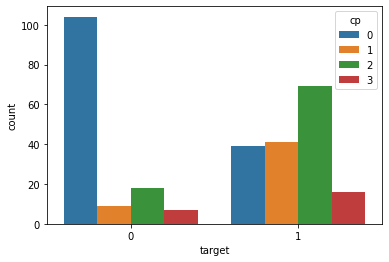

In [ ]:
sns.countplot(x="target", hue="cp", data=heart)

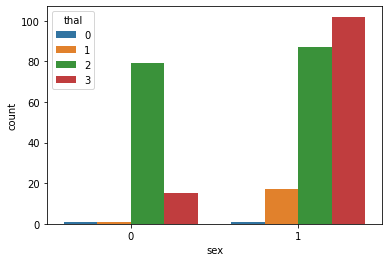

In [ ]:
sns.countplot(x="sex", hue="thal", data = heart)

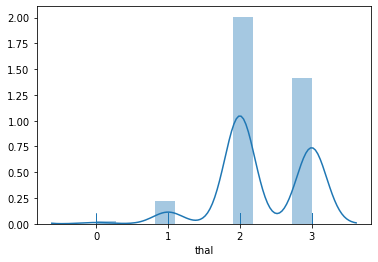

In [ ]:
sns.distplot(heart["thal"],rug=True)

### LogisticRegression

In [10]:
X = heart.drop("target",axis=1)
y = heart["target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)


In [12]:
logmodel = LogisticRegression()

In [13]:
logmodel.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [14]:
prediction = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
classification_report(y_test , prediction)

'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77        41\n           1       0.80      0.86      0.83        50\n\n    accuracy                           0.80        91\n   macro avg       0.80      0.80      0.80        91\nweighted avg       0.80      0.80      0.80        91\n'

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test , prediction)

array([[30, 11],
       [ 7, 43]])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test , prediction)

0.8021978021978022

In [ ]:
X = heart[["trestbps"]]

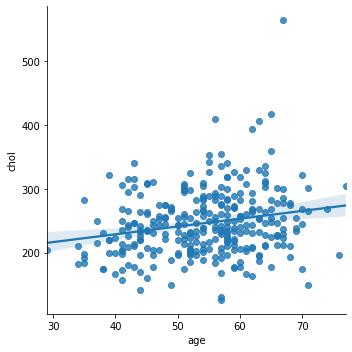

In [ ]:
sns.lmplot(x='age', y='chol' ,data=heart)


0.21001256735867366


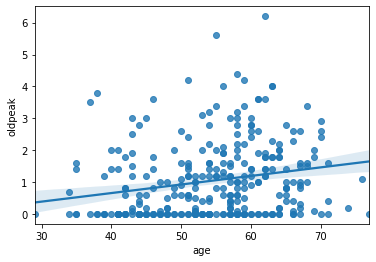

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(heart["age"] , heart["oldpeak"] )
sns.regplot(x="age" , y="oldpeak", data=heart )
print(corr)

In [21]:
corr = heart.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


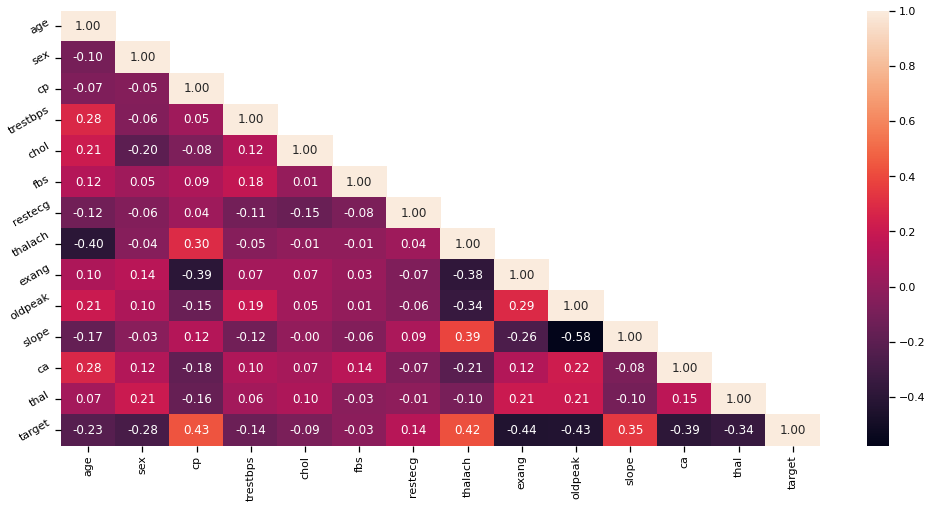

In [22]:
sns.set_context("notebook" , font_scale=1.0 , rc={"lines.linewidth":2.5} )
plt.figure(figsize=(17,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
a = sns.heatmap(corr , mask=mask , annot=True ,fmt='.2f'  )
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)



In [23]:
heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [24]:
heart['sex'][heart['sex'] ==0 ] = 'male'
heart['sex'][heart['sex'] ==1 ] = 'female'

heart['chest_pain_type'][heart['chest_pain_type'] == 1] = 'typical angina'
heart['chest_pain_type'][heart['chest_pain_type'] == 2] = 'atypical angina'
heart['chest_pain_type'][heart['chest_pain_type'] == 3] = 'non-anginal pain'
heart['chest_pain_type'][heart['chest_pain_type'] == 4] = 'asymptomatic'

heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'
heart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart['exercise_induced_angina'][heart['exercise_induced_angina'] == 0] = 'no'
heart['exercise_induced_angina'][heart['exercise_induced_angina'] == 1] = 'yes'

heart['st_slope'][heart['st_slope'] == 1] = 'upsloping'
heart['st_slope'][heart['st_slope'] == 2] = 'flat'
heart['st_slope'][heart['st_slope'] == 3] = 'downsloping'

heart['thalassemia'][heart['thalassemia'] == 1] = 'normal'
heart['thalassemia'][heart['thalassemia'] == 2] = 'fixed defect'
heart['thalassemia'][heart['thalassemia'] == 3] = 'reversable defect'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main_

In [ ]:
heart.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,female,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,female,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,male,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1


In [25]:
heart['sex'] = heart['sex'].astype('object')
heart['chest_pain_type'] = heart['chest_pain_type'].astype('object')
heart['fasting_blood_sugar'] = heart['fasting_blood_sugar'].astype('object')
heart['rest_ecg'] = heart['rest_ecg'].astype('object')
heart['exercise_induced_angina'] = heart['exercise_induced_angina'].astype('object')
heart['st_slope'] = heart['st_slope'].astype('object')
heart['thalassemia'] = heart['thalassemia'].astype('object')

In [26]:
heart = pd.get_dummies(heart, drop_first=True)

In [27]:
heart.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0


In [28]:
corr = heart.corr()
corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439,0.098447,-0.059432,0.047516,-0.147399,-0.121308,0.084621,0.141398,0.096801,-0.192580,0.177201,-0.135891,0.063758,0.110752
resting_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931,0.056769,-0.045107,0.151343,-0.081851,-0.177531,0.058635,0.133249,0.067616,-0.087472,0.025207,-0.140712,0.076369,0.109573
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239,0.197912,-0.037918,-0.050589,-0.012750,-0.013294,0.034615,0.166565,0.067023,-0.028054,0.051177,-0.004591,-0.093560,0.059621
max_heart_rate_achieved,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741,0.044020,0.165475,0.079082,0.248317,0.008567,-0.120870,-0.073953,-0.378812,0.448043,-0.419627,0.294801,-0.159748,-0.215417
st_depression,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696,-0.096093,-0.132444,0.086959,-0.277513,-0.005747,0.168172,0.100141,0.288223,-0.511356,0.310986,-0.339086,0.104635,0.302145
num_major_vessels,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724,-0.118261,-0.088998,-0.070496,-0.134715,-0.137979,0.030660,0.082679,0.115739,-0.120306,0.141923,-0.221331,0.066618,0.203601
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000,0.280937,0.316742,0.086957,0.245879,0.028046,-0.068410,-0.159775,-0.436757,0.394066,-0.362053,0.527334,-0.106589,-0.486112
sex_male,0.098447,0.056769,0.197912,0.044020,-0.096093,-0.118261,0.280937,1.000000,0.116588,-0.088043,0.041249,0.045032,0.107689,-0.036539,-0.141664,0.014356,0.009157,0.376365,-0.141135,-0.321559
chest_pain_type_atypical angina,-0.059432,-0.045107,-0.037918,0.165475,-0.132444,-0.088998,0.316742,0.116588,1.000000,-0.181894,-0.282135,-0.083679,-0.009492,-0.090611,-0.271028,0.120276,-0.105320,0.210130,-0.097775,-0.173717
chest_pain_type_non-anginal pain,0.047516,0.151343,-0.050589,0.079082,0.086959,-0.070496,0.086957,-0.088043,-0.181894,1.000000,-0.127412,-0.055511,-0.033150,0.070850,-0.093384,-0.044421,0.009321,0.009998,0.033404,-0.022554


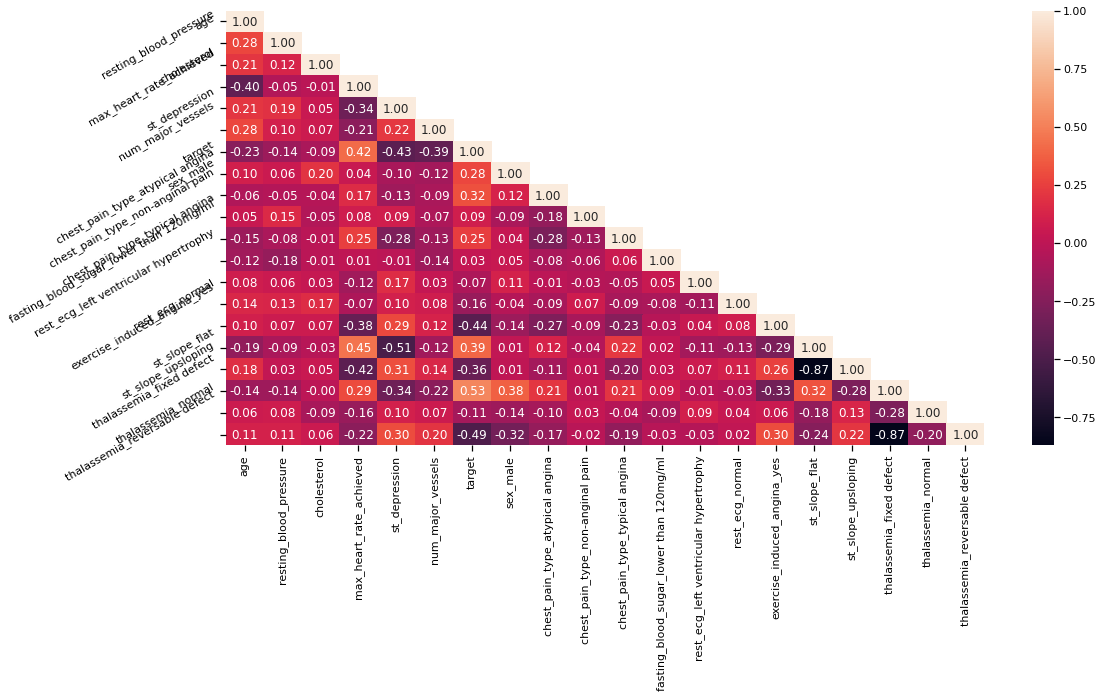

In [29]:
sns.set_context("notebook" , font_scale=1.0 , rc={"lines.linewidth":2.5} )
plt.figure(figsize=(17,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
a = sns.heatmap(corr , mask=mask , annot=True ,fmt='.2f'  )
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


In [ ]:
heart

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
299,45,110,264,132,1.2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
300,68,144,193,141,3.4,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1


In [30]:
X = heart.drop("target",axis=1)
y = heart["target"]

In [31]:

from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
lr = LogisticRegression(random_state=1)

In [34]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [35]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [37]:
accuracy_score(y_test,Y_pred)

0.8021978021978022

In [38]:
confusion_matrix(y_test,Y_pred)

array([[32,  9],
       [ 9, 41]])

Text(0.5, 12.5, 'Predicted label')

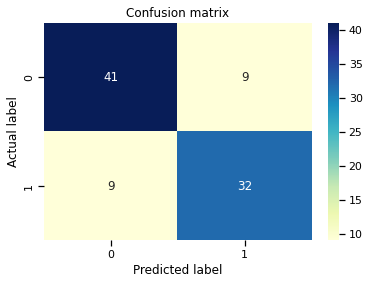

In [39]:
cnf_matrix = confusion_matrix(y_test, Y_pred,labels = [1,0])
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [40]:
Y_pred_proba = lr.predict_proba(X_test)
Y_pred_proba

array([[0.9840232 , 0.0159768 ],
       [0.22419543, 0.77580457],
       [0.90136331, 0.09863669],
       [0.98946311, 0.01053689],
       [0.94707313, 0.05292687],
       [0.99038499, 0.00961501],
       [0.97186784, 0.02813216],
       [0.39561927, 0.60438073],
       [0.99420812, 0.00579188],
       [0.02503801, 0.97496199],
       [0.55097412, 0.44902588],
       [0.92477059, 0.07522941],
       [0.17106049, 0.82893951],
       [0.84917246, 0.15082754],
       [0.79869647, 0.20130353],
       [0.06634721, 0.93365279],
       [0.04382209, 0.95617791],
       [0.98838875, 0.01161125],
       [0.30236638, 0.69763362],
       [0.55218112, 0.44781888],
       [0.03543053, 0.96456947],
       [0.94277567, 0.05722433],
       [0.38403583, 0.61596417],
       [0.0513551 , 0.9486449 ],
       [0.04850746, 0.95149254],
       [0.22419595, 0.77580405],
       [0.9939719 , 0.0060281 ],
       [0.02411424, 0.97588576],
       [0.10014845, 0.89985155],
       [0.01822216, 0.98177784],
       [0.

In [41]:
from sklearn.preprocessing import binarize

In [42]:
import decimal

def thr(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

thr = list(thr(0, 1, '0.005'))
NPV =[]
for t in thr:
    y_pred_low = binarize(Y_pred_proba, threshold=t)
    second_column = confusion_matrix(y_test,y_pred_low[:,1],labels=[1,0])[:,1]
    npv = second_column[1]/second_column.sum()
    NPV.append(npv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [43]:
TH_data = pd.DataFrame({'threshold':thr ,' negative predictive value ': NPV  })
TH_data.head(20)

,threshold,negative predictive value
0,0.000,NaN
1,0.005,NaN
2,0.010,1.000000
3,0.015,1.000000
4,0.020,1.000000
5,0.025,1.000000
6,0.030,1.000000
7,0.035,1.000000
8,0.040,1.000000
9,0.045,1.000000


In [51]:
Y_pred_TH = binarize(Y_pred_proba, threshold=0.075)
Y_pred_TH


array([[1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.

In [52]:
confusion_matrix(y_test, Y_pred_TH[:,1],labels = [1,0])


array([[49,  1],
       [21, 20]])

Text(0.5, 1.1, 'Confusion matrix')

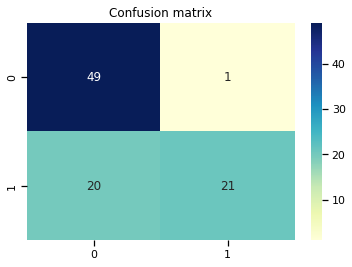

In [48]:
new_cnf = confusion_matrix(y_test, Y_pred_TH[:,1],labels = [1,0])
p = sns.heatmap(pd.DataFrame(new_cnf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')


In [49]:
def npv_func(th):
 y_pred_low = binarize(Y_pred_proba, threshold=th)
 second_column = confusion_matrix(y_test,y_pred_low[:,1],labels=[1,0])[:,1]
 npv = second_column[1]/second_column.sum()
 return npv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


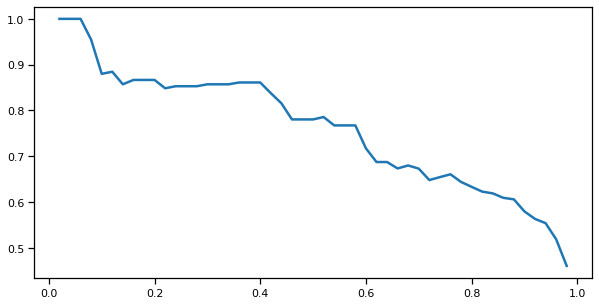

In [50]:
plt.figure(figsize=(10,5))

ths = np.arange(0,1,0.02)
npvs = []
for th in np.arange(0,1.00,0.02):
 npvs.append(npv_func(th))
plt.plot(ths,npvs)


### PCA

In [68]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [70]:
X = df.drop("target",axis=1)
y = df["target"]

In [71]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [72]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [73]:
scaler_data=scaler.transform(X)

In [74]:
scaler_data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [75]:
from sklearn.decomposition import PCA

In [76]:
pac=PCA(n_components=3)

In [77]:

pac.fit(scaler_data)

PCA(n_components=3)

In [78]:
x_pca = pac.transform(scaler_data)

In [79]:
scaler_data.shape

(303, 13)

In [80]:
x_pca.shape

(303, 3)

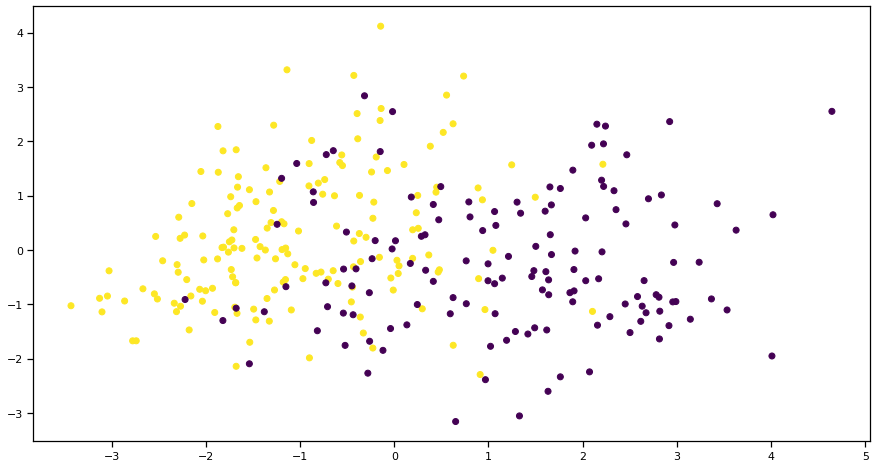

In [81]:
plt.figure(figsize=(15,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['target'])


In [82]:
scores_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,0.624111,2.321270,2.474673
1,-0.455988,-0.957351,1.139595
2,-1.828805,0.042885,-0.452229
3,-1.716006,-0.495337,0.030631
4,-0.371356,0.301156,-2.841069
...,...,...,...
298,1.146672,-0.519529,-1.708020
299,-0.708593,-1.045752,0.544810
300,2.459005,0.478262,2.208216
301,1.762755,-2.336816,0.454753


In [83]:
Y_label = []

for i in y:
  if i == 0:
    Y_label.append('live')
  else:
    Y_label.append('dead')

status_1 = pd.DataFrame(Y_label, columns=['status'])

In [84]:
df_scores = pd.concat([scores_df, status_1], axis=1)


In [85]:
loadings = pac.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=X.columns)
df_loadings

,PC1,PC2,PC3
age,0.314203,0.406149,-0.094077
sex,0.090838,-0.377792,0.554849
cp,-0.274607,0.297266,0.356974
trestbps,0.183920,0.438187,0.203849
chol,0.117375,0.364514,-0.407825
fbs,0.073640,0.317433,0.481736
restecg,-0.127728,-0.220882,-0.089191
thalach,-0.416498,0.077876,0.158255
exang,0.361267,-0.263118,-0.126356
oldpeak,0.419639,-0.052255,0.110343


In [86]:
explained_variance = pac.explained_variance_ratio_
explained_variance

array([0.21254053, 0.11820708, 0.09406418])

In [87]:
import numpy as np
import plotly.express as px

In [88]:
explained_variance = np.insert(explained_variance, 0, 0)


In [89]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [90]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [91]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.212541,0.213
2,PC2,0.118207,0.331
3,PC3,0.094064,0.425


In [92]:

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [93]:
import plotly.express as px


In [94]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='status')

fig.show()

In [95]:
loadings_label = df_loadings.index
# loadings_label = df_loadings.index.str.strip(' (cm)')

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()